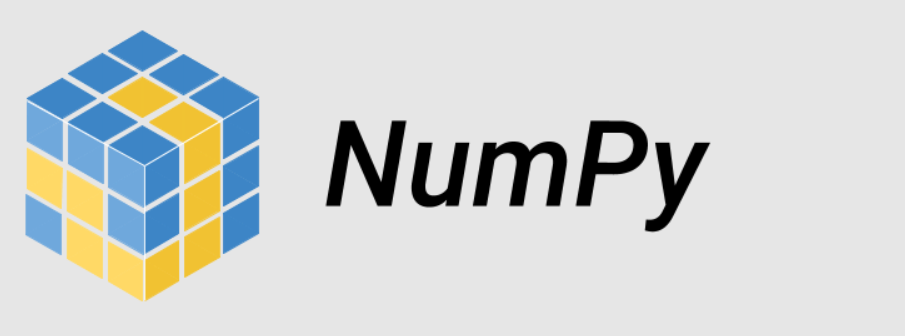

# Numpy -  Multidimensional Data Arrays

The latest version of a similar tutorial covering a larger set of topics is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Other notebooks are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [2]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [3]:
# a vector: the argument to the array function is a Python list
x = np.array([1,2,3,4])

x

array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
y = np.array([[1, 2], [3, 4]])

y

array([[1, 2],
       [3, 4]])

The `x` and `y` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(x)

numpy.ndarray

The difference between the `x` and `y` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
x.shape

(4,)

In [7]:
y.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [8]:
y.size

4

So far the `numpy.ndarray` looks very similar to a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [9]:
y.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [10]:
y = np.array([[1, 2], [3, 4]], dtype=float)

y

array([[1., 2.],
       [3., 4.]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [11]:
# create a range
# stop value is excluded from output

x = np.arange(0, 11, 1) # arguments: start, stop, step

x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
x = np.arange(-1, 1.1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

#### linspace and logspace

In [13]:
# using linspace, both end points ARE included
# this example creates 21 evenly spaced points starting from 0 and ending at 10
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [14]:
np.logspace(0, 10, 11, base=np.e)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03, 2.20264658e+04])

#### mgrid

In [15]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [16]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [17]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [18]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[0.89617712, 0.28708781, 0.14079803, 0.1565374 , 0.16996539],
       [0.51934224, 0.89512489, 0.52530207, 0.80286108, 0.68464401],
       [0.81466247, 0.56203171, 0.91029012, 0.08452978, 0.46510642],
       [0.76562087, 0.45575287, 0.57479709, 0.91828346, 0.31585481],
       [0.22166377, 0.25262177, 0.21178456, 0.41718556, 0.93495587]])

In [19]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[ 1.12474543, -1.26353573, -0.2904392 ,  0.93590292, -0.82973534],
       [ 0.36048901,  0.23651265,  1.04442911, -0.02856966,  0.26585044],
       [-0.41838971,  0.78010229,  0.49625383, -0.04857573,  0.13449812],
       [-0.30631082,  0.76923065,  0.42732009, -1.02600846, -1.69720828],
       [-0.82745272, -0.99830489, -0.23356887, -0.04009346, -0.44334053]])

#### diag

In [20]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### zeros and ones

In [21]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [23]:
!head ./data/stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [24]:
data = np.genfromtxt('./data/stockholm_td_adj.dat')

In [25]:
data.shape

(77431, 7)

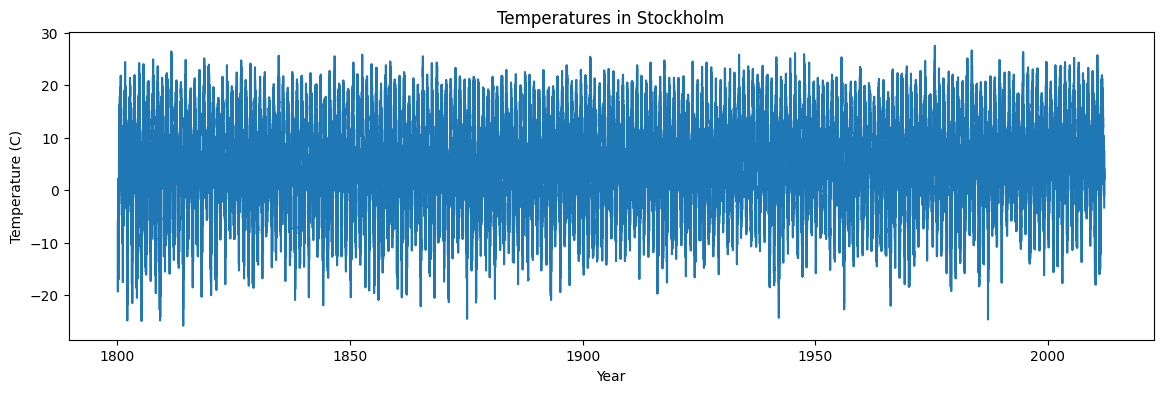

In [26]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('Temperatures in Stockholm')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [27]:
v = np.array([1,2,3,4])
M = np.array([[1, 2], [3, 4]])

In [28]:
# v is a vector, and has only one dimension, so it takes only one index
v[0]

1

In [29]:
# M is a matrix, or a 2 dimensional array, so it takes two indices 
M[1,1]

4

We can use `:` to get an entire row or column:

In [30]:
M[1,:] # row with index 1

array([3, 4])

We can assign new values to elements in an array using indexing:

In [31]:
M[0,0] = 10

In [32]:
M

array([[10,  2],
       [ 3,  4]])

In [33]:
# also works to replace entire rows or columns
M[1,:] = 0

In [34]:
M

array([[10,  2],
       [ 0,  0]])

### Index slicing

Index slicing is the technical name for the syntax `A[lower:upper:step]` to extract part of an array:

In [35]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [36]:
# exclusive of end point
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [37]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `A[lower:upper:step]`, just like with Python lists:

In [38]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

Negative indices counts from the end of the array:

In [39]:
A = np.array([1,2,3,4,5])

In [40]:
A[-1] # the last element in the array

5

Index slicing works exactly the same way for multidimensional arrays:

In [41]:
# grab a block of values spanning rows and columns
X = np.array([[1,2,3,4,5],[6,7,8,9,10]])
X[1:2, 1:3]

array([[7, 8]])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [42]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [43]:
B = np.arange(0, 5)
B

array([0, 1, 2, 3, 4])

In [44]:
B + 2

array([2, 3, 4, 5, 6])

In [45]:
B * 2

array([0, 2, 4, 6, 8])

In [46]:
A + 2

array([3, 4, 5, 6, 7])

In [47]:
A * 2

array([ 2,  4,  6,  8, 10])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [48]:
A * A # element-wise multiplication

array([ 1,  4,  9, 16, 25])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [49]:
A.shape, B.shape

((5,), (5,))

In [50]:
A * B

array([ 0,  2,  6, 12, 20])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [51]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [52]:
B = np.arange(0, 5)
B

array([0, 1, 2, 3, 4])

In [53]:
np.dot(A, A)

55

In [54]:
np.dot(A, B)

40

In [55]:
np.dot(B, B)

30

### Matrix computations

#### Inverse

In [56]:
C = np.array([[1,2],[3,4]])
np.linalg.inv(C)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### Determinant

In [57]:
np.linalg.det(C)

-2.0000000000000004

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [58]:
# reminder, the tempeature dataset is stored in the data variable:
np.shape(data)

(77431, 7)

#### mean

In [59]:
# the temperature data is in column 3
np.mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [60]:
# standard deviation of average temperature
np.std(data[:,3])

8.282271621340573

In [61]:
# variance of average temperature
np.var(data[:,3])

68.59602320966341

#### min and max

In [62]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [63]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [64]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
# sum up all elements
sum(d)

45

In [66]:
# product of all elements
np.prod(d[1:])

362880

In [67]:
# cumulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [68]:
# same as: diag(C).sum()
C = np.array([[1,2],[3,4]])
np.trace(C)

5

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [69]:
m = np.random.rand(3,3)
m

array([[0.95786603, 0.48467741, 0.42052026],
       [0.23454726, 0.63087981, 0.37519841],
       [0.32701372, 0.82191938, 0.65600461]])

In [70]:
# global max
m.max()

0.957866030712049

In [71]:
# max in each column
m.max(axis=0)

array([0.95786603, 0.82191938, 0.65600461])

In [72]:
# max in each row
m.max(axis=1)

array([0.95786603, 0.63087981, 0.82191938])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [73]:
A = np.linspace(1,20,20)
A

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [74]:
B = A.reshape((4,5))
B

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.]])

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### concatenate

In [75]:
a = np.array([[1, 2], [3, 4]])

In [76]:
b = np.array([[5, 6]])

In [77]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [78]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [79]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [80]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [81]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [82]:
# now B is referring to the same array data as A 
B = A 

In [83]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [84]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [85]:
B = np.copy(A)

In [86]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [87]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [88]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [89]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [90]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [91]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [92]:
M

array([[ 1,  4],
       [ 9, 16]])

In [93]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [94]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("not all elements in M are larger than 5")

not all elements in M are larger than 5


## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.